In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6783119872
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5138500096
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6608309760
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2023 entries, 2017-12-01 to 2023-06-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2023 non-null   float64
 1   High       2023 non-null   float64
 2   Low        2023 non-null   float64
 3   Close      2023 non-null   float64
 4   Adj Close  2023 non-null   float64
 5   Volume     2023 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.6 KB


# Mô tả trường dữ liệu
| Tên     | Mô tả |
| ----------- | ----------- |
|Date         | Là cột thể hiện ngày giao dịch của đồng coin.
|Open |Là giá mở cửa của đồng coin tại thời điểm giao dịch.
|High| Là giá cao nhất của đồng coin trong khoảng thời gian giao dịch đó.
|Low| Là giá thấp nhất của đồng coin trong khoảng thời gian giao dịch đó.
|Close| Là giá đóng cửa của đồng coin tại thời điểm giao dịch.
|Adj Close| Là giá đóng cửa đã được điều chỉnh (chỉnh sửa) để tính toán các sự thay đổi giá cả do chia cổ tức, phát hành mới hoặc hợp nhất cổ phiếu.
|Volume|Là số lượng đồng coin được giao dịch trong khoảng thời gian đó.









In [ ]:
# Số hàng và số cột trong df
df.shape

(2023, 6)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2023.0,2.064931e+04,1.624285e+04,3.236275e+03,8.107687e+03,1.240076e+04,3.029153e+04,6.754973e+04
High,2023.0,2.115103e+04,1.666004e+04,3.275378e+03,8.261824e+03,1.312953e+04,3.067973e+04,6.878962e+04
Low,2023.0,2.009004e+04,1.576031e+04,3.191303e+03,7.885360e+03,1.180670e+04,2.937141e+04,6.638206e+04
Close,2023.0,2.065476e+04,1.623741e+04,3.236762e+03,8.106151e+03,1.257381e+04,3.030564e+04,6.756683e+04
Adj Close,2023.0,2.065476e+04,1.623741e+04,3.236762e+03,8.106151e+03,1.257381e+04,3.030564e+04,6.756683e+04
Volume,2023.0,2.592997e+10,1.914825e+10,2.923670e+09,1.298836e+10,2.340074e+10,3.467315e+10,3.509679e+11


In [ ]:
# Kiểm tra xem có bao nhiêu dòng dữ liệu trong tất cả các cột có giá trị là null
df.isnull().sum().sort_values(ascending=False)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Loại bỏ các trường không cần thiết:
df = df.drop(columns = ['Adj Close'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,6783119872
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,5138500096
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,6608309760
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,6895260160


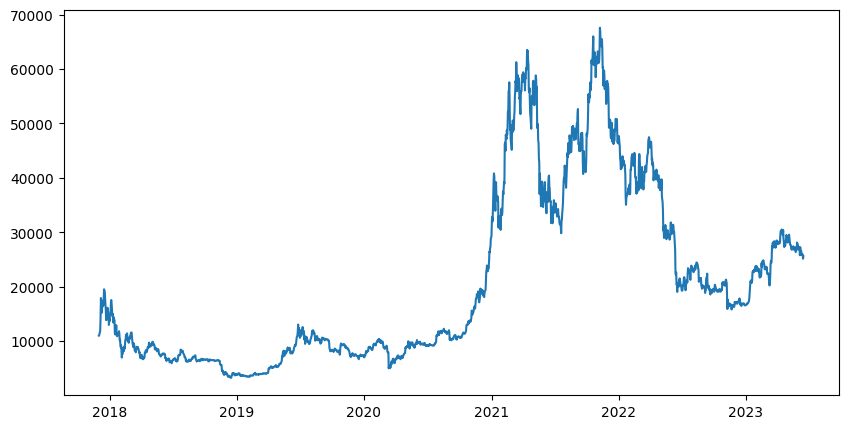

In [ ]:
#Vẽ biểu đồ giá Close (giá close ban đầu của tập dữ liệu)
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.show()

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1941.000000,1941.000000,1941.000000,1941.000000,1.941000e+03
mean,20560.212357,21058.427381,20005.364960,20564.852669,2.641886e+10
std,16528.088215,16958.114625,16030.961050,16523.839346,1.937213e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,2.923670e+09
25%,7973.803711,8177.793457,7768.227539,7963.327637,1.324991e+10
50%,11633.099610,11900.411130,11307.831060,11601.472660,2.422043e+10
75%,31723.865230,32637.587890,30221.187500,31726.390630,3.522206e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,3.510000e+11


# Áp Dụng 4 Thuật Toán Bắt Buộc:
1.  LN (Linear Regression)
2.  ARIMA
3. RNN(Recurrent Neural Network)
2.GRU(Gated Recurrent Unit)







**I/Chuẩn bị dữ liệu**

**1.Tách dữ liệu thành các tập X(đầu vào) và tập y(đầu ra)**

In [ ]:
x = df[['Open','High','Low','Volume']]
y = df['Close']

In [ ]:
x.head()

,Open,High,Low,Volume
Date,,,,
2018-01-01,14112.2002,14112.20020,13154.70020,1.029120e+10
2018-01-02,13625.0000,15444.59961,13163.59961,1.684660e+10
2018-01-03,14978.2002,15572.79981,14844.50000,1.687190e+10
2018-01-04,15270.7002,15739.70020,14522.20020,2.178320e+10
2018-01-05,15477.2002,17705.19922,15202.79981,2.384090e+10


In [ ]:
y.head()

Date
2018-01-01    13657.20020
2018-01-02    14982.09961
2018-01-03    15201.00000
2018-01-04    15599.20020
2018-01-05    17429.50000
Name: Close, dtype: float64

**II/Cắt dữ liệu thành tập train và test, validate**

In [ ]:
from sklearn.model_selection import train_test_split

n_rows = len(df)
train_rows = int(n_rows * 0.7)
test_rows = int(n_rows * 0.2)

# Chia tập dữ liệu thành 3 tập train, test và validate
X_train = x[:train_rows]
X_test = x[train_rows:train_rows+test_rows]
X_validate = x[train_rows+test_rows:]

y_train = y[:train_rows]
y_test = y[train_rows:train_rows+test_rows]
y_validate = y[train_rows+test_rows:]

In [ ]:
X_train.head()

,Open,High,Low,Volume
Date,,,,
2018-01-01,14112.2002,14112.20020,13154.70020,1.029120e+10
2018-01-02,13625.0000,15444.59961,13163.59961,1.684660e+10
2018-01-03,14978.2002,15572.79981,14844.50000,1.687190e+10
2018-01-04,15270.7002,15739.70020,14522.20020,2.178320e+10
2018-01-05,15477.2002,17705.19922,15202.79981,2.384090e+10


In [ ]:
y_train.head()

Date
2018-01-01    13657.20020
2018-01-02    14982.09961
2018-01-03    15201.00000
2018-01-04    15599.20020
2018-01-05    17429.50000
Name: Close, dtype: float64

**III/Áp dụng thuật toán và đánh giá mô hình**

**1/Mô hình hồi quy tuyến tính( Linear Models)**

In [ ]:
from sklearn import linear_model , metrics
import time
from sklearn.metrics import r2_score

In [ ]:

model = linear_model.LinearRegression()
model.fit(X_train,y_train) # bước traning dữ liệu
start = time.time()
print('Giá Close dự đoán: ' , model.predict(X_test.head()))
end = time.time()
print("Thời gian chạy mô hình: " , end - start)

Giá Close dự đoán:  [44226.00240017 41363.25748531 43434.64879261 44323.51372467
 42412.58502024]
Thời gian chạy mô hình:  0.002803325653076172


**Đánh giá mô hình trên tập test**

In [ ]:
# 1. mse:tổng bình phương sai số trên tập mẫu (Giá trị MSE càng nhỏ, mô hình dự báo càng chính xác.)
mse_linear = metrics.mean_squared_error(y_test,model.predict(X_test))

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu,được sử dụng để đánh giá sai số trung bình giữa giá trị dự báo và giá trị thực tế
#(giá trị này càng nhỏ thì mô hình càng chính xác)
rmse_linear = np.sqrt(mse_linear)

# 3. mae : trị tuyệt đối trung bình(giá trị này càng nhỏ thì mô hình càng chính xác)
mae_linear = metrics.mean_absolute_error(y_test,model.predict(X_test))

#4. mape : tính toán độ sai lệch trung bình giữa các giá trị dự đoán và giá trị thực tế dưới dạng phần trăm(Giá trị MAPE càng nhỏ thì độ chính xác của mô hình càng cao)
#  mô hình có MAPE dưới 10% được xem là rất tốt
mape_linear = metrics.mean_absolute_percentage_error(y_test, model.predict(X_test))

# 5.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1,
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_linear = r2_score(y_test , model.predict(X_test))

print('MSE: ' , mse_linear)
print('RMSE: ' , rmse_linear)
print('MAE: ' , mae_linear)
print('MAPE: ', mape_linear * 100)
print('R2_squared: ' , r2_linear)

MSE:  341669.75379441
RMSE:  584.5252379447871
MAE:  436.5502753589259
MAPE:  1.2024349847367868
R2_squared:  0.9981915019162151


**Đánh giá mô hình trên tập validate**

In [ ]:
predicted_close = model.predict(X_validate)

mse = metrics.mean_squared_error(y_validate, predicted_close)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_validate, predicted_close)
mape = metrics.mean_absolute_percentage_error(y_validate, predicted_close)
r2 = r2_score(y_validate, predicted_close)

# In ra kết quả đánh giá hiệu suất của mô hình trên tập dữ liệu validate
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape * 100)
print('R2-squared:', r2)

MSE: 44517.27540041042
RMSE: 210.99117375001833
MAE: 136.58363881087828
MAPE: 0.636550414221988
R2-squared: 0.9976094592190878


**Dự đoán giá Close ở 30 ngày tiếp theo trong tập validate**

In [ ]:
# Lấy ra dữ liệu của 30 ngày tiếp theo
next_30_days_data = X_validate[['Open', 'High', 'Low', 'Volume']].tail(30)


In [ ]:
# Dự đoán giá Close của 30 ngày tiếp theo
predicted_close_next_30_days = model.predict(next_30_days_data)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.20020,14112.20020,13154.70020,13657.20020,13657.20020,1.029120e+10
2018-01-02,13625.00000,15444.59961,13163.59961,14982.09961,14982.09961,1.684660e+10
2018-01-03,14978.20020,15572.79981,14844.50000,15201.00000,15201.00000,1.687190e+10
2018-01-04,15270.70020,15739.70020,14522.20020,15599.20020,15599.20020,2.178320e+10
2018-01-05,15477.20020,17705.19922,15202.79981,17429.50000,17429.50000,2.384090e+10
...,...,...,...,...,...,...
2023-04-21,28249.23047,28349.96875,27177.36523,27276.91016,27276.91016,2.075950e+10
2023-04-22,27265.89453,27872.14258,27169.57031,27817.50000,27817.50000,1.312573e+10
2023-04-23,27816.14453,27820.24414,27400.31445,27591.38477,27591.38477,1.278545e+10


In [ ]:
# Tạo DataFrame mới chứa dữ liệu về ngày và giá trị Close dự đoán
from datetime import datetime, timedelta
start_date = datetime(2023, 4, 26)
end_date = datetime(2023, 5, 25)
dates = pd.date_range(start=start_date, end=end_date, freq='D')
predicted_data = pd.DataFrame({'Date': dates, 'Giá Close Dự Đoán trong 30 ngày tiếp theo': predicted_close_next_30_days})
predicted_data = predicted_data.set_index('Date')
predicted_data.head()

,Giá Close Dự Đoán trong 30 ngày tiếp theo
Date,
2023-04-26,27044.212718
2023-04-27,27018.292471
2023-04-28,28353.716691
2023-04-29,28558.273436
2023-04-30,28170.193528


**Vẽ biểu đồ so sánh dữ liệu thực tế và dữ liệu được dự báo**

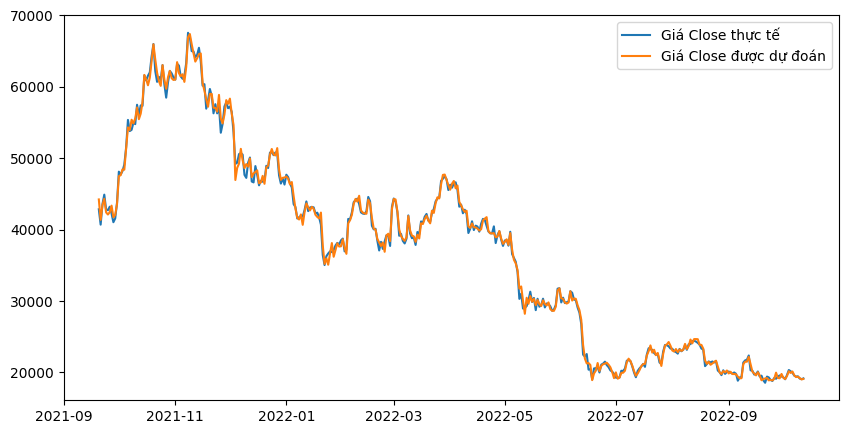

In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(X_test.index,y_test.values, label='Giá Close thực tế')
plt.plot(X_test.index,y_pred, label='Giá Close được dự đoán')
plt.legend()
plt.show()

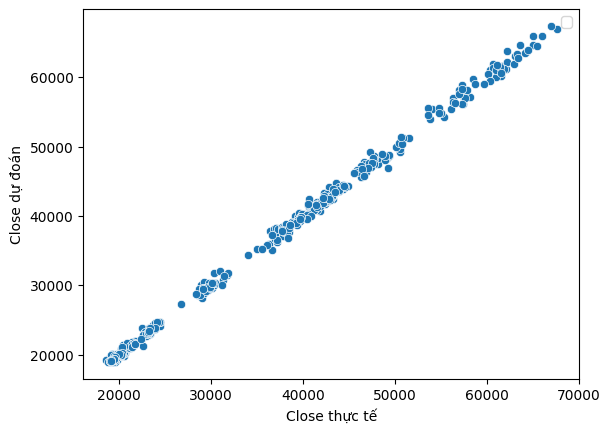

In [ ]:

sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Close thực tế')
plt.ylabel('Close dự đoán')
plt.legend()
plt.show()

**Chênh lệch giữa giá Close thực tế và giá Close dự đoán của mô hình hồi quy
tuyến tính**


In [ ]:
y_predict_1 = model.predict(X_test.head())
for i in range(len(y_predict_1)):
  y_predict_1[i] = round(y_predict_1[i],0)

moi = pd.DataFrame({'Close thực tế' : y_test.head(),
                    'Close dự đoán' : y_predict_1,
                    'Độ lệch': y_predict_1 - y_test.head()})
moi.head(37)

,Close thực tế,Close dự đoán,Độ lệch
Date,,,
2021-09-20,42843.80078,44226.0,1382.19922
2021-09-21,40693.67578,41363.0,669.32422
2021-09-22,43574.50781,43435.0,-139.50781
2021-09-23,44895.09766,44324.0,-571.09766
2021-09-24,42839.75000,42413.0,-426.75000


**2/Mô hình ARIMA((Autoregressive Integrated Moving Average)**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

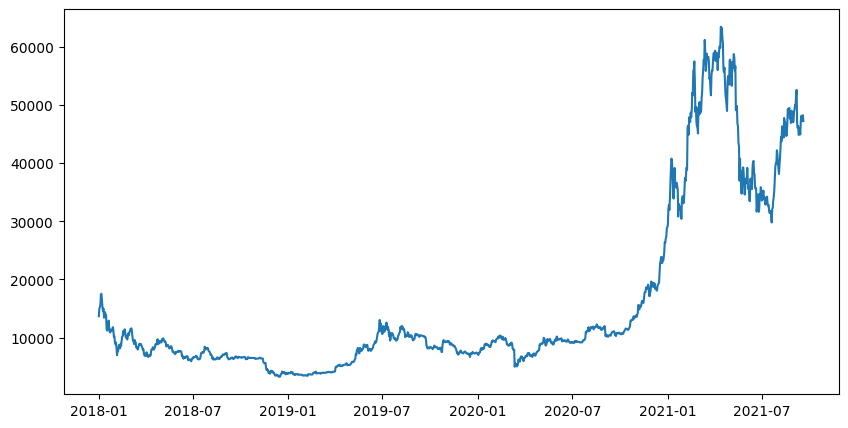

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_train)
plt.show()

In [ ]:
# Kiểm tra tính dừng của dữ liệu
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

result = adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Nếu p-value > 0.05 thì ta cần thực hiện phép sai phân để biến đổi dữ liệu thành dữ liệu dừng
# Hàm diff() được sử dụng để áp dụng phép toán sai phân (differencing) trên dữ liệu thô (raw data) để biến đổi nó thành dữ liệu có tính chất chuỗi dừng (stationary series)
y_test_diff = np.diff(y_test)
y_validate_diff = np.diff(y_validate)
if result[1] > 0.05:
    y_train_diff = y_train.diff().dropna()
else:
    y_train_diff = y_train

ADF Statistic: -0.139396
p-value: 0.945370
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


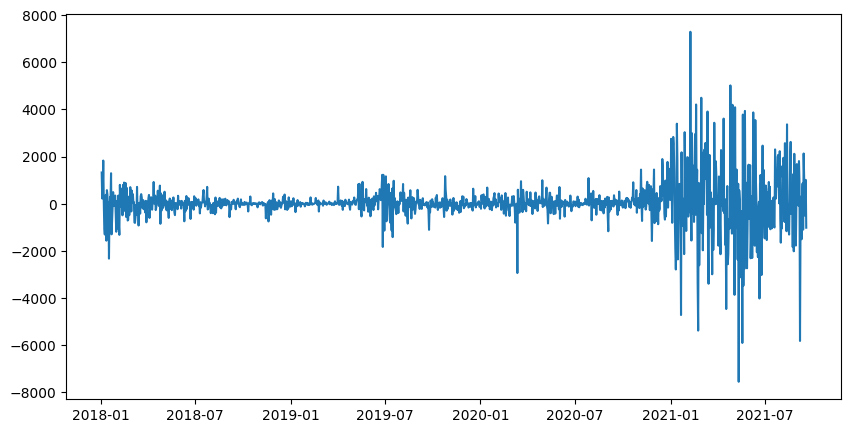

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_train_diff)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


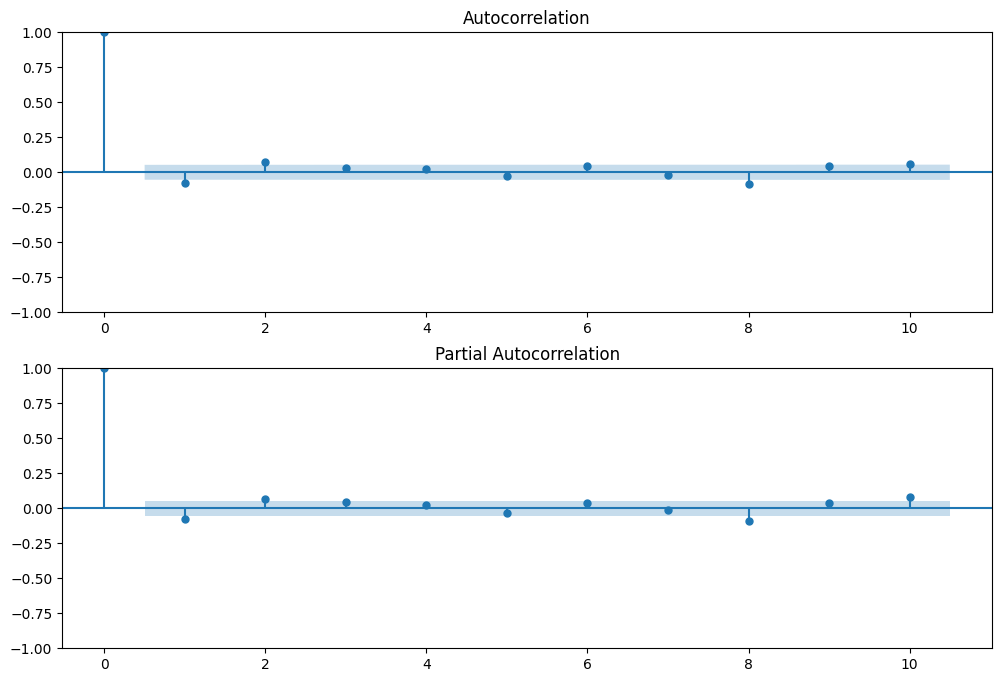

In [ ]:
# Xác định các tham số cho mô hình ARIMA
# lags: độ trễ
# trục tung là độ tương quan
# trục hoành là độ trễ (lags)
# xác định p dựa vào đồ thị PACF: Chúng ta có thể chọn thứ tự p cho mô hình AR (p) dựa trên các cột đột biến đáng kể từ biểu đồ PACF.
# xác định q dựa vào đồ thị ACF : chúng ta cần phân tích tất cả các cột cao hơn vùng màu xanh (đường giới hạn)
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
sm.graphics.tsa.plot_acf(y_train_diff, lags=10, ax=ax1)
sm.graphics.tsa.plot_pacf(y_train_diff, lags=10, ax=ax2)
plt.show()


**Dựa vào đồ thị**
*    PACF: Chọn p = 1 vì p nằm ngoài vùng giới hạn và không có cột nào tăng đột biến.
*   Dựa vào đồ thị ACF:  q = 1 hoặc q = 8 vì có 2 cột cao hơn vùng giới hạn.





In [ ]:
# Huấn luyện mô hình ARIMA trên tập train
model = ARIMA(y_train_diff, order=(1,1,1))
# model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# # Dự đoán trên tập test và validate
y_pred_test_diff = model_fit.forecast(steps=len(y_test_diff))
y_pred_validate_diff = model_fit.forecast(steps=len(y_validate_diff))

# Dự đoán trên tập test
# start = len(y_train_diff) + len(y_validate_diff)
# end = start + len(y_test_diff) - 1
# y_pred_test_diff = model_fit.predict(start=len(y_train_diff) , end=len(y_train_diff) + len(y_test_diff) - 1, typ='levels')

# Dự đoán trên tập validate
# start = len(y_train_diff)
# end = start + len(y_validate_diff) - 1
# y_pred_val = model_fit.predict(start=start, end=end, typ='levels')
# y_pred_val = model_fit.predict(start=len(y_train)+len(y_test) - 1, end=len(y_train)+len(y_test)+len(y_validate)-2, typ='levels')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1357
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11163.139
Date:                Sun, 30 Apr 2023   AIC                          22332.278
Time:                        09:47:39   BIC                          22347.915
Sample:                    01-02-2018   HQIC                         22338.133
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0757      0.016     -4.695      0.000      -0.107      -0.044
ma.L1         -1.0000      0.130     -7.716      0.000      -1.254      -0.746
sigma2      8.242e+05   1.08e+05      7.601      0.0

**Biểu đồ so sánh giá trị thực tế và giá trị dự đoán**

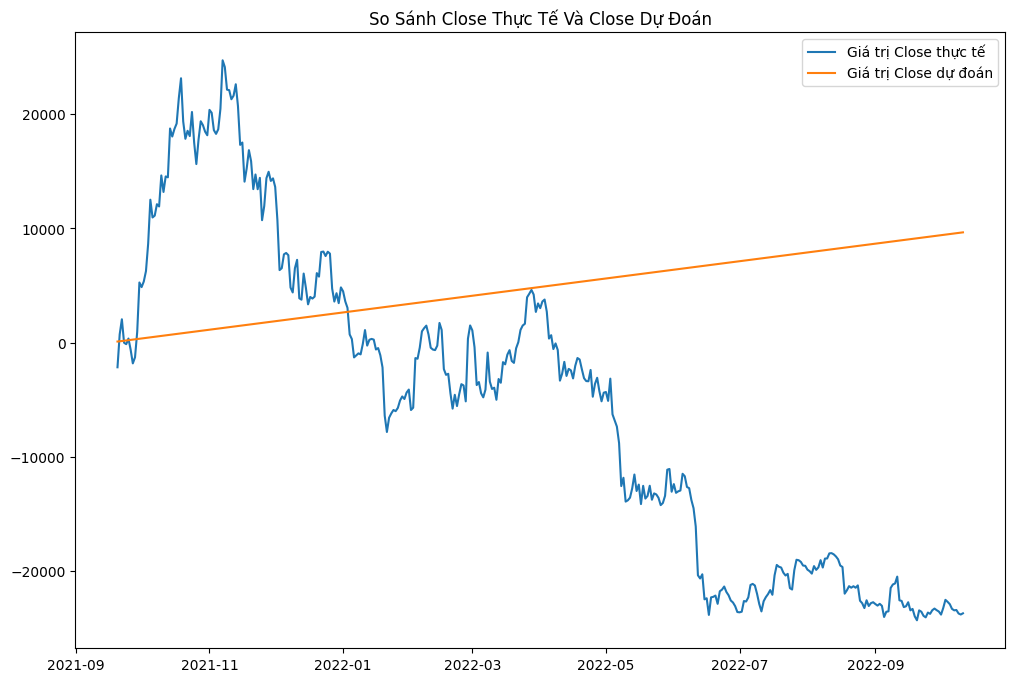

In [ ]:
# Chuyển đổi chuỗi sai số dự đoán sang giá trị dự đoán
y_pred_test = np.cumsum(y_pred_test_diff)
y_pred_validate = np.cumsum(y_pred_validate_diff)
y_test1 = np.cumsum(y_test_diff)
y_validate1 = np.cumsum(y_validate_diff)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(y_pred_test.index,y_test1, label='Giá trị Close thực tế')
ax.plot(y_pred_test.index,y_pred_test, label='Giá trị Close dự đoán')
ax.legend()
plt.title("So Sánh Close Thực Tế Và Close Dự Đoán")
plt.show()

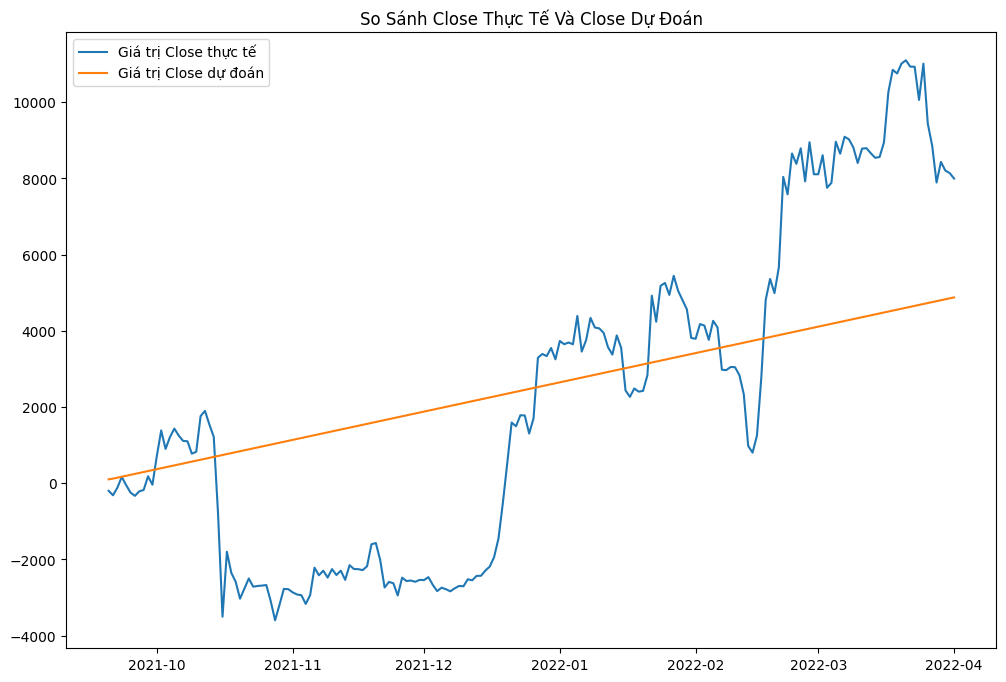

In [ ]:
# Chuyển đổi chuỗi sai số dự đoán sang giá trị dự đoán
y_pred_test = np.cumsum(y_pred_test_diff)
y_pred_validate = np.cumsum(y_pred_validate_diff)
y_test1 = np.cumsum(y_test_diff)
y_validate1 = np.cumsum(y_validate_diff)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(y_pred_validate.index,y_validate1, label='Giá trị Close thực tế')
ax.plot(y_pred_validate.index,y_pred_validate, label='Giá trị Close dự đoán')
ax.legend()
plt.title("So Sánh Close Thực Tế Và Close Dự Đoán")
plt.show()

In [ ]:
y_train_diff

Date
2018-01-02    1324.89941
2018-01-03     218.90039
2018-01-04     398.20020
2018-01-05    1830.29980
2018-01-06      97.50000
                 ...    
2021-09-15    1083.85547
2021-09-16    -392.98828
2021-09-17    -515.83985
2021-09-18    1010.84375
2021-09-19   -1018.14453
Name: Close, Length: 1357, dtype: float64

**Đánh giá trên tập Test**

In [ ]:
mse_test_arima = metrics.mean_squared_error(y_test1, y_pred_test)
rmse_test_arima  = np.sqrt(mse_test_arima)
mae_test_arima  = metrics.mean_absolute_error(y_test1, y_pred_test)
mape_test_arima  = metrics.mean_absolute_percentage_error(y_test1, y_pred_test)
r2_test_arima  = r2_score(y_test1, y_pred_test)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu test:")
print("MSE: ", mse_test_arima )
print("RMSE: ", rmse_test_arima )
print("MAE: ", mae_test_arima)
print("MAPE: ", mape_test_arima * 100)
print("R2: ", r2_test_arima )

Chỉ số đánh giá hiệu suất trên tập dữ liệu test:
MSE:  376059524.09105563
RMSE:  19392.254229229144
MAE:  15975.742439323567
MAPE:  251.88142318438008
R2:  -0.9862304579539929


**Đánh giá trên tập Validate**

In [ ]:
mse_validate_arima  = metrics.mean_squared_error(y_validate1, y_pred_validate)
rmse_validate_arima  = np.sqrt(mse_validate_arima )
mae_validate_arima  = metrics.mean_absolute_error(y_validate1, y_pred_validate)
mape_validate_arima  = metrics.mean_absolute_percentage_error(y_validate1, y_pred_validate)
r2_validate_arima  = r2_score(y_validate1, y_pred_validate)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu validate:")
print("MSE: ", mse_validate_arima )
print("RMSE: ", rmse_validate_arima )
print("MAE: ", mae_validate_arima )
print("MAPE: ", mape_validate_arima * 100)
print("R2: ", r2_validate_arima )

Chỉ số đánh giá hiệu suất trên tập dữ liệu validate:
MSE:  10696481.046620399
RMSE:  3270.5475148085525
MAE:  2730.690438175114
MAPE:  101.888867156838
R2:  0.4277949046226128


**Chênh lệch giữa giá Close thực tế và giá Close dự đoán của mô hình ARIMA**


In [ ]:

for i in range(len(y_pred_test)):
  y_pred_test[i] = round(y_pred_test[i],0)

moi = pd.DataFrame({'Close thực tế' : y_test1[:5],
                    'Close dự đoán' : y_pred_test.head(),
                    'Độ lệch': y_pred_test.head() - y_test1[:5]})
moi.head(37)

,Close thực tế,Close dự đoán,Độ lệch
2021-09-20,-2150.12500,104.0,2254.12500
2021-09-21,730.70703,123.0,-607.70703
2021-09-22,2051.29688,148.0,-1903.29688
2021-09-23,-4.05078,172.0,176.05078
2021-09-24,-127.20703,197.0,324.20703


**Dự đoán giá Close của 30 ngày tiếp theo**

In [ ]:
y_train_diff

Date
2018-01-02    1324.89941
2018-01-03     218.90039
2018-01-04     398.20020
2018-01-05    1830.29980
2018-01-06      97.50000
                 ...    
2021-09-15    1083.85547
2021-09-16    -392.98828
2021-09-17    -515.83985
2021-09-18    1010.84375
2021-09-19   -1018.14453
Name: Close, Length: 1357, dtype: float64

In [ ]:
# Tập dữ liệu y_train_diff để training cho model được lấy từ 2018-01-02 đến 2021-09-19. Vậy hàm forecast dự đoán giá trị tương lai của 30 ngày tiếp theo bắt đầu từ
#  2021-09-20 đến đến 2021-10-19
n_forecast = 30
y_pred_forecast30 = model_fit.forecast(steps=n_forecast, typ='levels')
forecast30_data = pd.DataFrame({'Date': y_pred_forecast30.index, 'Giá Close Dự Đoán trong 30 ngày tiếp theo': y_pred_forecast30})
forecast30_data = forecast30_data.set_index('Date')
forecast30_data

,Giá Close Dự Đoán trong 30 ngày tiếp theo
Date,
2021-09-20,103.705275
2021-09-21,18.798844
2021-09-22,25.224928
2021-09-23,24.738575
2021-09-24,24.775384
2021-09-25,24.772598
2021-09-26,24.772809
2021-09-27,24.772793
2021-09-28,24.772794


In [ ]:
y_train_diff


Date
2018-01-02    1324.89941
2018-01-03     218.90039
2018-01-04     398.20020
2018-01-05    1830.29980
2018-01-06      97.50000
                 ...    
2021-09-15    1083.85547
2021-09-16    -392.98828
2021-09-17    -515.83985
2021-09-18    1010.84375
2021-09-19   -1018.14453
Name: Close, Length: 1357, dtype: float64

# Áp Dụng 5 Thuật Toán Tự Chọn:
1.  Exponential Smoothing (ETS)
2.  Gradient Boosted Tree (GBT)
3. Dynamic Linear Model (DLM)
2.Deep Feedforward Neural Network (DNN)
5.XGBOOST









**1/Mô hình Gradient Boosted Tree (GBT)**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Xây dựng mô hình Gradient Boosted Tree (GBT)
gbt = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
# n_estimators=200 : có nghĩa là mô hình sẽ sử dụng 200 cây quyết định để huấn luyện mô hình.
# max_depth=5 : có nghĩa là độ sâu tối đa của cây quyết định là 5.
# learning_rate=0.1 : có nghĩa là tốc độ học của mô hình là 0.1.

# Huấn luyện mô hình trên tập train
gbt.fit(X_train, y_train)




GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [ ]:
y_test_pred = gbt.predict(X_test)
y_validate_pred = gbt.predict(X_validate)

**Đánh giá mô hình trên tập Test với tỉ lệ 5:3:2**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
y_test_pred = gbt.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', mean_squared_error(y_test, y_test_pred, squared=False))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred) * 100)
print('MAE:', mean_absolute_error(y_test, y_test_pred))

MSE: 654358936.9784552
RMSE: 25580.440515723243
MAPE:  47.192217753091036
MAE: 22007.09083084569


**Đánh giá mô hình trên tập Test với tỉ lệ 6:2:2**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
y_test_pred = gbt.predict(X_test)
print('R-squared:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', mean_squared_error(y_test, y_test_pred, squared=False))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred) * 100)
print('MAE:', mean_absolute_error(y_test, y_test_pred))

R-squared: 0.9641740613394879
MSE: 2830886.3248686637
RMSE: 1682.5237962265685
MAPE:  2.777488016186827
MAE: 1294.743259418335


**Đánh giá mô hình trên tập Validate tỉ lệ 6:2:2**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
y_validate_pred = gbt.predict(X_validate)
print('R-squared:', r2_score(y_validate, y_validate_pred ))
print('MSE:', mean_squared_error(y_validate, y_validate_pred ))
print('RMSE:', mean_squared_error(y_validate,y_validate_pred , squared=False))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_validate, y_validate_pred) * 100)
print('MAE:', mean_absolute_error(y_validate, y_validate_pred ))

R-squared: 0.9739594039404554
MSE: 509609.4328015699
RMSE: 713.869338745943
MAPE:  2.395382595017671
MAE: 545.2374378528494


**Đánh giá mô hình trên tập Test với tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
print('R-squared:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', mean_squared_error(y_test, y_test_pred, squared=False))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred) * 100)
print('MAE:', mean_absolute_error(y_test, y_test_pred))

R-squared: 0.9958296223421713
MSE: 825261.7199112134
RMSE: 908.4391668742676
MAPE:  2.0583131388241234
MAE: 659.1504237183651


**Đánh giá mô hình trên tập Validate tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
print('R-squared:', r2_score(y_validate, y_validate_pred ))
print('MSE:', mean_squared_error(y_validate, y_validate_pred ))
print('RMSE:', mean_squared_error(y_validate,y_validate_pred , squared=False))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_validate, y_validate_pred) * 100)
print('MAE:', mean_absolute_error(y_validate, y_validate_pred ))

R-squared: 0.9838697942368875
MSE: 320945.60484664195
RMSE: 566.5206129053399
MAPE:  1.8363348880317265
MAE: 442.05473464308005


**Dự đoán giá Close ở 30 ngày tiếp theo trong tập validate**

In [ ]:
o# Lấy ra dữ liệu của 30 ngày tiếp theo
next_30_days_data = X_validate[['Open', 'High', 'Low', 'Volume']].tail(30)

# Dự đoán giá Close của 30 ngày tiếp theo
predicted_close_next_30_days = gbt.predict(next_30_days_data)

# Tạo DataFrame mới chứa dữ liệu về ngày và giá trị Close dự đoán
from datetime import datetime, timedelta
start_date = datetime(2023, 6, 16)
end_date = datetime(2023, 7, 15)
dates = pd.date_range(start=start_date, end=end_date, freq='D')
predicted_data = pd.DataFrame({'Date': dates, 'Giá Close Dự Đoán trong 30 ngày tiếp theo': predicted_close_next_30_days})
predicted_data = predicted_data.set_index('Date')
predicted_data.head()


,Giá Close Dự Đoán trong 30 ngày tiếp theo
Date,
2023-06-16,19077.078656
2023-06-17,19077.078656
2023-06-18,19240.102450
2023-06-19,19201.562829
2023-06-20,19214.822162


**Vẽ biểu đồ so sánh dữ liệu thực tế và dữ liệu được dự báo trên tập TEST và Validate tỉ lệ 5:3:2**



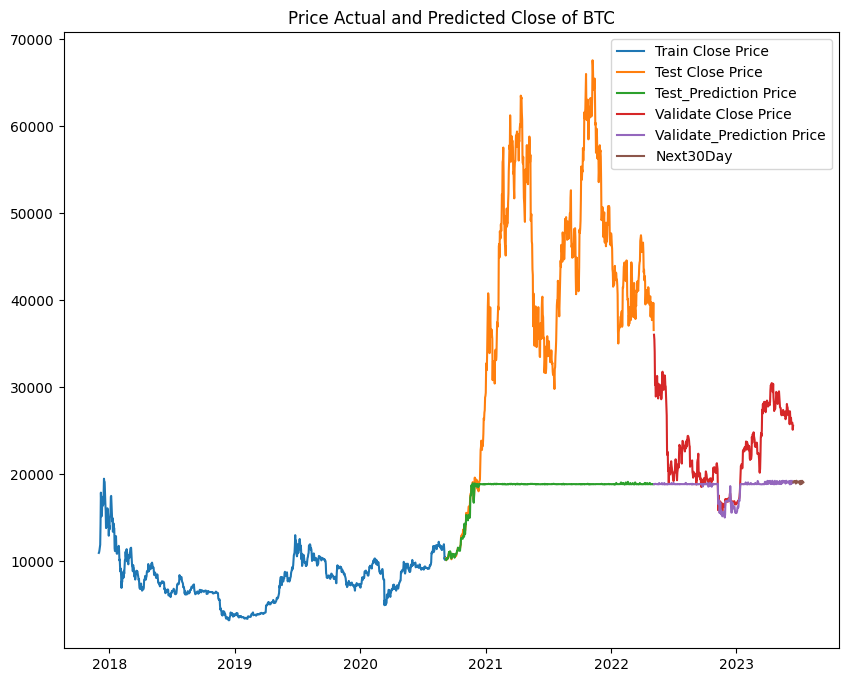

In [ ]:

plt.figure(figsize=(10,8))
plt.title('Price Actual and Predicted Close of BTC')
plt.plot(y_train.index, y_train , label = 'Train Close Price')
plt.plot(y_test.index, y_test , label = 'Test Close Price')
plt.plot(y_test.index, y_test_pred, label = 'Test_Prediction Price')
plt.plot(y_validate.index, y_validate , label = 'Validate Close Price')
plt.plot(y_validate.index, y_validate_pred, label = 'Validate_Prediction Price')
plt.plot(dates,predicted_data,  label = 'Next30Day')
plt.legend()
plt.show()

**Vẽ biểu đồ so sánh dữ liệu thực tế và dữ liệu được dự báo trên tập TEST và Validate tỉ lệ 6:2:2**

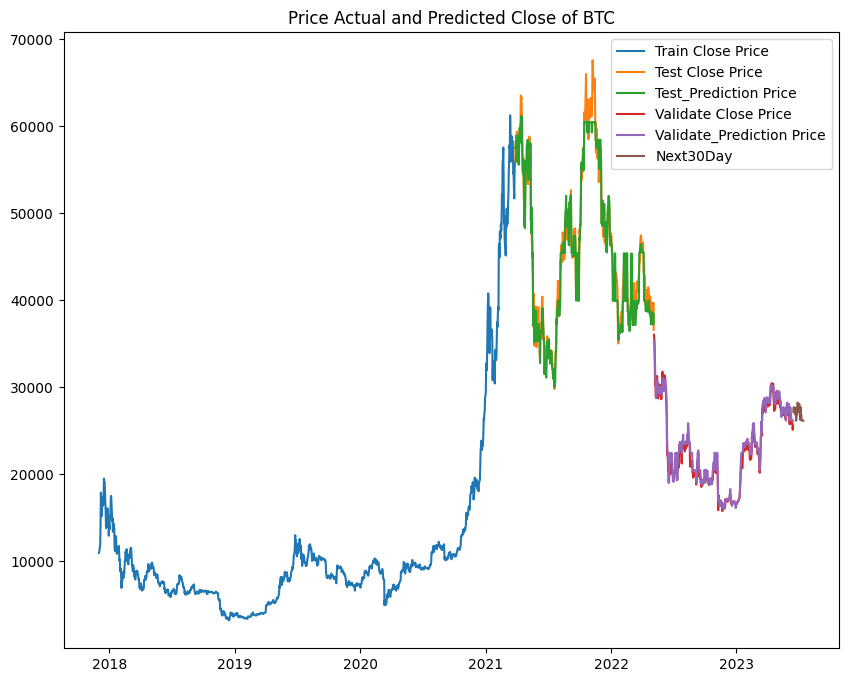

In [ ]:

plt.figure(figsize=(10,8))
plt.title('Price Actual and Predicted Close of BTC')
plt.plot(y_train.index, y_train , label = 'Train Close Price')
plt.plot(y_test.index, y_test , label = 'Test Close Price')
plt.plot(y_test.index, y_test_pred, label = 'Test_Prediction Price')
plt.plot(y_validate.index, y_validate , label = 'Validate Close Price')
plt.plot(y_validate.index, y_validate_pred, label = 'Validate_Prediction Price')
plt.plot(dates,predicted_data,  label = 'Next30Day')
plt.legend()
plt.show()

**Vẽ biểu đồ so sánh dữ liệu thực tế và dữ liệu được dự báo trên tập TEST và Validate tỉ lệ 7:2:1**

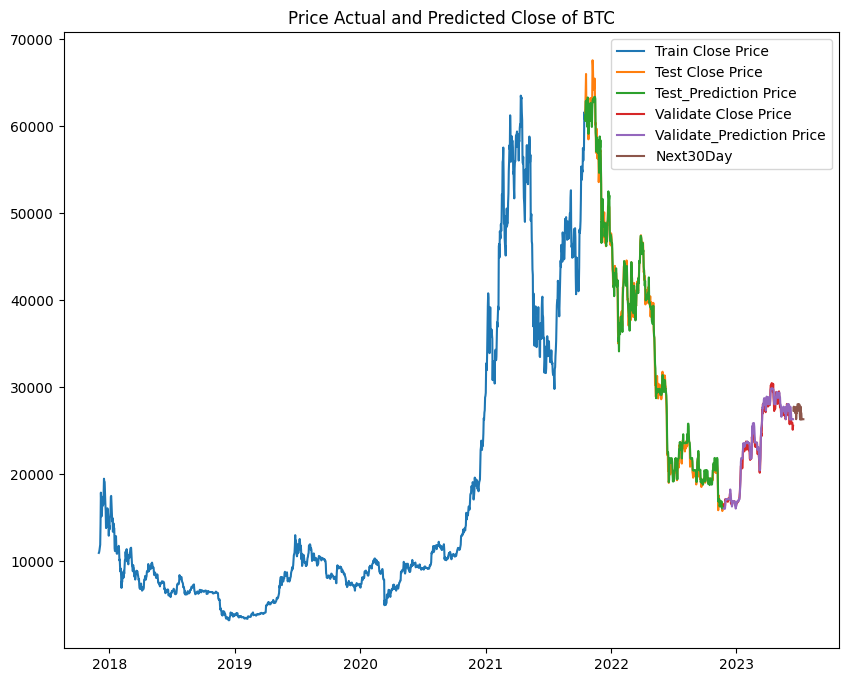

In [ ]:

plt.figure(figsize=(10,8))
plt.title('Price Actual and Predicted Close of BTC')
plt.plot(y_train.index, y_train , label = 'Train Close Price')
plt.plot(y_test.index, y_test , label = 'Test Close Price')
plt.plot(y_test.index, y_test_pred, label = 'Test_Prediction Price')
plt.plot(y_validate.index, y_validate , label = 'Validate Close Price')
plt.plot(y_validate.index, y_validate_pred, label = 'Validate_Prediction Price')
plt.plot(dates,predicted_data,  label = 'Next30Day')
plt.legend()
plt.show()

**Chênh lệch giữa giá Close thực tế và giá Close dự đoán của mô hình GBT**


In [ ]:
y_test_pred = gbt.predict(X_test.head())
for i in range(len(y_test_pred)):
  y_test_pred[i] = round(y_test_pred[i],0)

moi_gbt = pd.DataFrame({'Close thực tế' : y_test.head(),
                    'Close dự đoán' : y_test_pred,
                    'Độ lệch': y_test_pred - y_test.head()})
moi_gbt.head()

,Close thực tế,Close dự đoán,Độ lệch
Date,,,
2021-09-20,42843.80078,45573.0,2729.19922
2021-09-21,40693.67578,42194.0,1500.32422
2021-09-22,43574.50781,42688.0,-886.50781
2021-09-23,44895.09766,43782.0,-1113.09766
2021-09-24,42839.75000,42891.0,51.25000


**2/Mô hình Exponential Smoothing (ETS)**

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from itertools import product

In [ ]:
# # Xác định khoảng giá trị của alpha, beta và phi
# alphas = np.linspace(0, 1, num=11)
# betas = np.linspace(0, 1, num=11)
# phis = np.linspace(0, 1, num=11)

# # Tạo ra tất cả các cặp giá trị có thể từ khoảng giá trị đó
# param_combinations = list(product(alphas, betas, phis))

# # Tìm cặp giá trị cho mô hình có độ chính xác tốt nhất trên tập test
# best_params = None
# best_mse = float('inf')
# for params in param_combinations:
#     model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=30)
#     model_fit = model.fit(smoothing_level=params[0], smoothing_slope=params[1], damping_slope=params[2])
#     y_pred_test = model_fit.forecast(len(y_test))
#     mse = mean_squared_error(y_test, y_pred)
#     if mse < best_mse:
#         best_mse = mse
#         best_params = params


model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=30)
model_fit_ets = model.fit(0.8,0.5)


y_pred_test = model_fit_ets.forecast(len(y_test))
y_pred_validate = model_fit_ets.predict(start=X_validate.index[0], end=X_validate.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
# # Tìm cặp giá trị cho mô hình có độ chính xác tốt nhất trên tập validation
# best_params = None
# best_mse = float('inf')
# for params in param_combinations:
#     model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=30)
#     model_fit = model.fit(smoothing_level=params[0], smoothing_slope=params[1], damping_slope=params[2])
#     y_pred = model_fit.forecast(len(y_validate))
#     mse = mean_squared_error(y_validate, y_pred)
#     if mse < best_mse:
#         best_mse = mse
#         best_params = params


# model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=30)
# model_fit = model.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1], damping_slope=best_params[2])
# y_pred_validate = model_fit.forecast(len(y_validate))

In [ ]:
# model = ExponentialSmoothing(endog = y_train,trend='add', seasonal='add', seasonal_periods=12)
# #Trong đó
# # trend='add' và seasonal='add' đề cập đến việc áp dụng mô hình với một mức trung bình gia tăng (additive) cho các yếu tố trong chuỗi dữ liệu.
# # seasonal_periods=7 là vì chuỗi dữ liệu của chúng ta là dữ liệu theo tuần, vì vậy chúng ta sử dụng chu kỳ 7 để tính toán thành phần mùa vụ.
# model_fit_ets = model.fit(0.1,0.2,0.1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# y_pred_test = model_fit_ets.predict(start=X_test.index[0], end=X_test.index[-1])
# y_pred_validate = model_fit_ets.predict(start=X_validate.index[0], end=X_validate.index[-1])
# #Các tham số start và end chỉ ra phạm vi của dữ liệu cần dự đoán (từ vị trí index đầu tiên đến vị trí index cuối cùng trong tập test và validate).

**Đánh giá mô hình trên tập Test tỉ lệ 5:3:2**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
from sklearn.metrics import r2_score
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MSE: 4893117168.519384
RMSE: 69950.81964151231
MAPE: 148.0872696474531
MAE: 63320.91479440217


**Đánh giá mô hình trên tập Test tỉ lệ 6:2:2**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
from sklearn.metrics import r2_score
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MSE: 69211409639.74344
RMSE: 263080.6143366391
MAPE: 525.510121967063
MAE: 229681.8677121467


**Đánh giá mô hình trên tập Validate tỉ lệ 6:2:2**

In [ ]:
# Đánh giá mô hình trên tập test
print('MSE:', metrics.mean_squared_error(y_validate, y_pred_validate))
print('RMSE:', metrics.mean_squared_error(y_validate, y_pred_validate, squared=False))
print('MAPE:', metrics.mean_absolute_percentage_error(y_validate, y_pred_validate) * 100)
print('MAE:', metrics.mean_absolute_error(y_validate, y_pred_validate))

MSE: 495068014262.38684
RMSE: 703610.697944813
MAPE: 3115.707906571505
MAE: 692148.37051448


**Đánh giá mô hình trên tập Test tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
from sklearn.metrics import r2_score
print('R-squared:', r2_score(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

R-squared: -472.0368988802475
MSE: 93607648223.06967
RMSE: 305953.67005981423
MAPE: 1107.0430222375949
MAE: 266019.9277713379


**Đánh giá mô hình trên tập Validate tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập test
print('R-squared:', r2_score(y_validate, y_pred_validate))
print('MSE:', metrics.mean_squared_error(y_validate, y_pred_validate))
print('RMSE:', metrics.mean_squared_error(y_validate, y_pred_validate, squared=False))
print('MAPE:', metrics.mean_absolute_percentage_error(y_validate, y_pred_validate) * 100)
print('MAE:', metrics.mean_absolute_error(y_validate, y_pred_validate))

R-squared: -20510.30641217446
MSE: 408117152336.92413
RMSE: 638840.4748737544
MAPE: 2747.654718976015
MAE: 635487.5481808735


**Vẽ biểu đồ so sánh dữ liệu thực tế và dữ liệu được dự báo trên tập Test và Validate tỉ lệ 6:2:2**

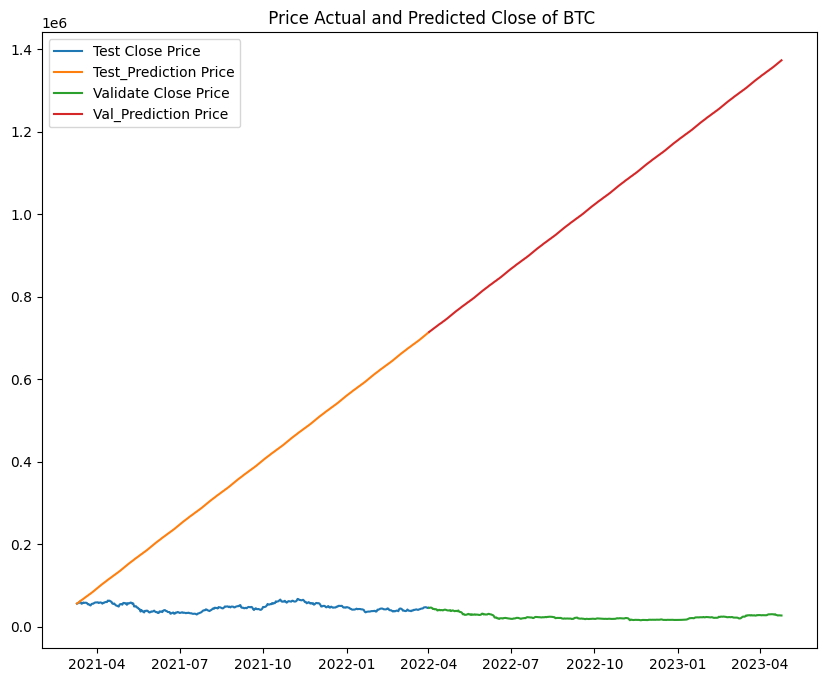

In [ ]:

plt.figure(figsize=(10,8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(y_test.index, y_test , label = 'Test Close Price')
plt.plot(y_test.index, y_pred_test, label = 'Test_Prediction Price')
plt.plot(y_validate.index, y_validate , label = 'Validate Close Price')
plt.plot(y_validate.index, y_pred_validate, label = 'Val_Prediction Price')
plt.legend()
plt.show()

**Vẽ biểu đồ so sánh dữ liệu thực tế và dữ liệu được dự báo trên tập Test và Validate tỉ lệ 7:2:1**

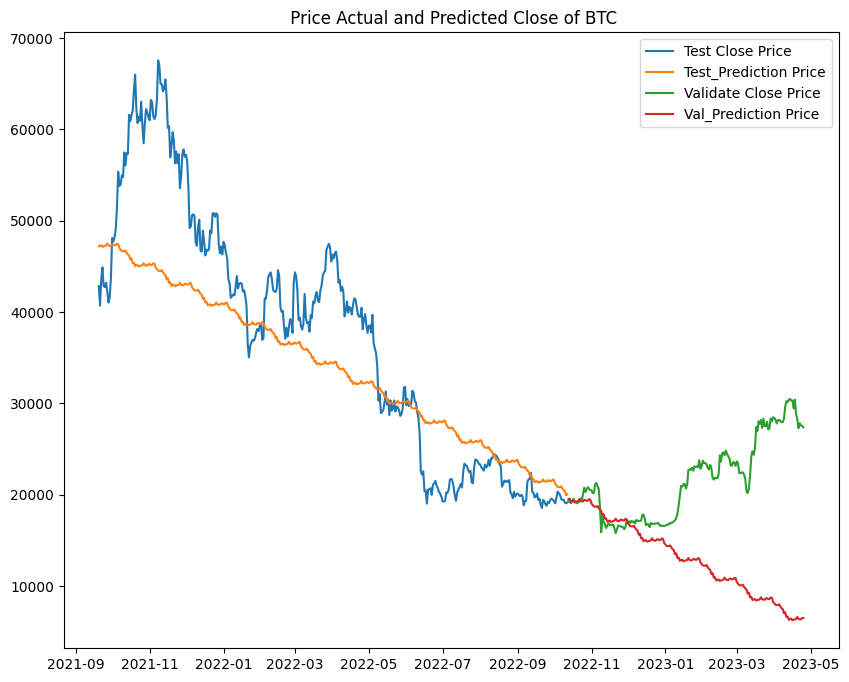

In [ ]:

plt.figure(figsize=(10,8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(y_test.index, y_test , label = 'Test Close Price')
plt.plot(y_test.index, y_pred_test, label = 'Test_Prediction Price')
plt.plot(y_validate.index, y_validate , label = 'Validate Close Price')
plt.plot(y_validate.index, y_pred_validate, label = 'Val_Prediction Price')
plt.legend()
plt.show()

In [ ]:
y_pred_validate.head()

2022-10-13    80474.769278
2022-10-14    80435.055806
2022-10-15    80530.278489
2022-10-16    80449.422352
2022-10-17    80533.662228
Freq: D, dtype: float64

**Dự Đoán Giá Close Trong 30 Ngày Tiếp Theo**

In [ ]:
n_forecast = 30
y_pred_forecast30 = model_fit.forecast(steps=n_forecast)
forecast30_data = pd.DataFrame({'Date': y_pred_forecast30.index, 'Giá Close Dự Đoán trong 30 ngày tiếp theo': y_pred_forecast30})
forecast30_data = forecast30_data.set_index('Date')
forecast30_data

,Giá Close Dự Đoán trong 30 ngày tiếp theo
Date,
2021-09-20,47186.821397
2021-09-21,47263.285598
2021-09-22,47300.484369
2021-09-23,47137.438132
2021-09-24,47210.953962
2021-09-25,47225.824613
2021-09-26,47296.995927
2021-09-27,47504.144934
2021-09-28,47273.407724


**Chênh lệch giữa giá Close thực tế và giá Close dự đoán của mô hình ETS**


In [ ]:

for i in range(len(y_pred_test)):
  y_pred_test[i] = round(y_pred_test[i],0)

moi_ets = pd.DataFrame({'Close thực tế' : y_test.head(),
                    'Close dự đoán' : y_pred_test.head(),
                    'Độ lệch': y_pred_test.head() - y_test.head()})
moi_ets.head()

,Close thực tế,Close dự đoán,Độ lệch
2021-09-20,42843.80078,47187.0,4343.19922
2021-09-21,40693.67578,47263.0,6569.32422
2021-09-22,43574.50781,47300.0,3725.49219
2021-09-23,44895.09766,47137.0,2241.90234
2021-09-24,42839.75000,47211.0,4371.25000
